In [1]:
#Question: Are certain NFL franchises profitable to on for the last 10 years? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scores = pd.read_csv("spreadspoke_scores.csv")
teams = pd.read_csv("nfl_teams.csv")

In [4]:
scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [5]:
#Regular Season Scores since 2015
scores = scores[scores['schedule_season']>=2015]
scores = scores[scores['schedule_playoff']==False]

In [6]:
scores = scores.drop(columns=["schedule_week", "schedule_date", "schedule_season", "schedule_playoff", "stadium", "stadium_neutral", "weather_temperature", "weather_wind_mph", "weather_humidity", "weather_detail"])
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
11343,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51
11344,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5
11345,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5
11346,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5
11347,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5


In [7]:
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [8]:
teams = teams.drop(columns=['team_name_short', 'team_id_pfr', 'team_conference', "team_division", "team_conference_pre2002", "team_division_pre2002"])


In [9]:
id_dict = dict(zip(teams.team_id, teams.team_name))
id_dict

{'ARI': 'St. Louis Cardinals',
 'ATL': 'Atlanta Falcons',
 'IND': 'Indianapolis Colts',
 'BAL': 'Baltimore Ravens',
 'NE': 'New England Patriots',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'TEN': 'Tennessee Titans',
 'HOU': 'Houston Texans',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LVR': 'Oakland Raiders',
 'LAC': 'San Diego Chargers',
 'LAR': 'St. Louis Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SF': 'San Francisco 49ers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'WAS': 'Washington Redskins'}

In [10]:
scores["over_under_line"] = scores["over_under_line"].astype("float")
scores.dtypes

team_home            object
score_home            int64
score_away            int64
team_away            object
team_favorite_id     object
spread_favorite     float64
over_under_line     float64
dtype: object

In [11]:
scores["total_points"] = scores["score_home"] + scores["score_away"]
cond = [scores["total_points"]>scores["over_under_line"], scores["total_points"]==scores["over_under_line"], scores["total_points"]<scores["over_under_line"]]
values = ["over", "push", "under"]
scores["o_u"] = np.select(cond, values)

In [12]:
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_points,o_u
11343,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51.0,49,under
11344,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5,50,over
11345,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5,41,under
11346,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5,54,over
11347,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5,53,over


In [13]:
scores["team_favorite_id"] = scores["team_favorite_id"].map({'ARI': 'Arizona Cardinals',
 'ATL': 'Atlanta Falcons',
 'IND': 'Indianapolis Colts',
 'BAL': 'Baltimore Ravens',
 'NE': 'New England Patriots',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'TEN': 'Tennessee Titans',
 'HOU': 'Houston Texans',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LVR': 'Las Vegas Raiders',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SF': 'San Francisco 49ers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'WAS': 'Washington Commanders'})

In [14]:
#Look at data for outdated cities and team names
scores["team_home"].unique()

array(['New England Patriots', 'Arizona Cardinals', 'Buffalo Bills',
       'Chicago Bears', 'Dallas Cowboys', 'Denver Broncos',
       'Houston Texans', 'Jacksonville Jaguars', 'New York Jets',
       'Oakland Raiders', 'San Diego Chargers', 'St. Louis Rams',
       'Tampa Bay Buccaneers', 'Washington Redskins', 'Atlanta Falcons',
       'San Francisco 49ers', 'Kansas City Chiefs', 'Carolina Panthers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Green Bay Packers',
       'Minnesota Vikings', 'New Orleans Saints', 'New York Giants',
       'Philadelphia Eagles', 'Pittsburgh Steelers', 'Indianapolis Colts',
       'Baltimore Ravens', 'Detroit Lions', 'Miami Dolphins',
       'Seattle Seahawks', 'Tennessee Titans', 'Los Angeles Rams',
       'Los Angeles Chargers', 'Washington Football Team',
       'Las Vegas Raiders', 'Washington Commanders'], dtype=object)

In [15]:
#Account for Franchise Name Changes and Location Switches
change = {'Oakland Raiders': 'Las Vegas Raiders', 'San Diego Chargers': "Los Angeles Chargers", 'St. Louis Rams': "Los Angeles Rams",'Washington Redskins': "Washington Commanders", "Washington Football Team": "Washington Commanders"}
scores.replace(change,inplace=True)
scores["team_home"].unique()

array(['New England Patriots', 'Arizona Cardinals', 'Buffalo Bills',
       'Chicago Bears', 'Dallas Cowboys', 'Denver Broncos',
       'Houston Texans', 'Jacksonville Jaguars', 'New York Jets',
       'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Rams',
       'Tampa Bay Buccaneers', 'Washington Commanders', 'Atlanta Falcons',
       'San Francisco 49ers', 'Kansas City Chiefs', 'Carolina Panthers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Green Bay Packers',
       'Minnesota Vikings', 'New Orleans Saints', 'New York Giants',
       'Philadelphia Eagles', 'Pittsburgh Steelers', 'Indianapolis Colts',
       'Baltimore Ravens', 'Detroit Lions', 'Miami Dolphins',
       'Seattle Seahawks', 'Tennessee Titans'], dtype=object)

In [16]:
#Make one data set with over/under/push data.
homeou = scores[["team_home", "o_u"]]
awayou = scores[["team_away", "o_u"]]
homeou = homeou.rename(columns={'team_home': "team"})
awayou = awayou.rename(columns={'team_away': "team"})
oudata = pd.concat([homeou, awayou])
oudata = oudata[oudata['o_u']!='push']

In [17]:
#find percent of games
ou_percent = oudata.groupby("team").value_counts() / oudata['team'].value_counts() * 100

In [18]:
ou_percent = ou_percent.unstack(level=1)

In [19]:
ou_percent = ou_percent.fillna(0)

In [20]:
#sort the under column and over column so chart shows profitable teams at the top. 
ou_under = ou_percent['under'].sort_values(ascending=True)
ou_over = ou_percent['over'].sort_values(ascending=True)

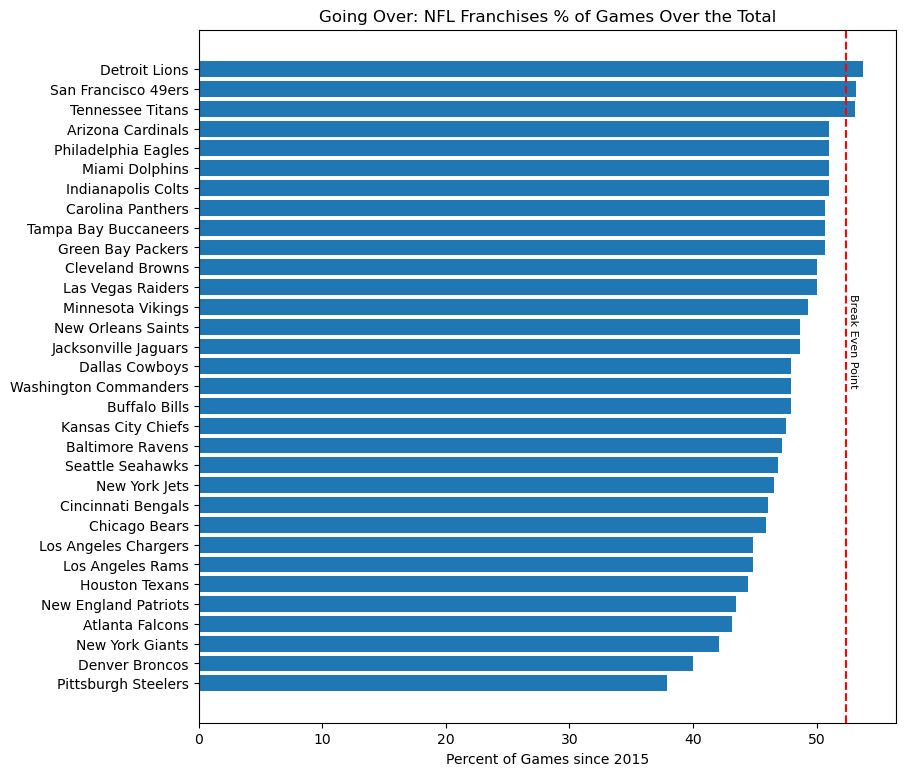

In [21]:
plt.figure(figsize=(9,9))
plt.barh(y=ou_over.index, width=ou_over)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games since 2015")
plt.title("Going Over: NFL Franchises % of Games Over the Total")
plt.show()

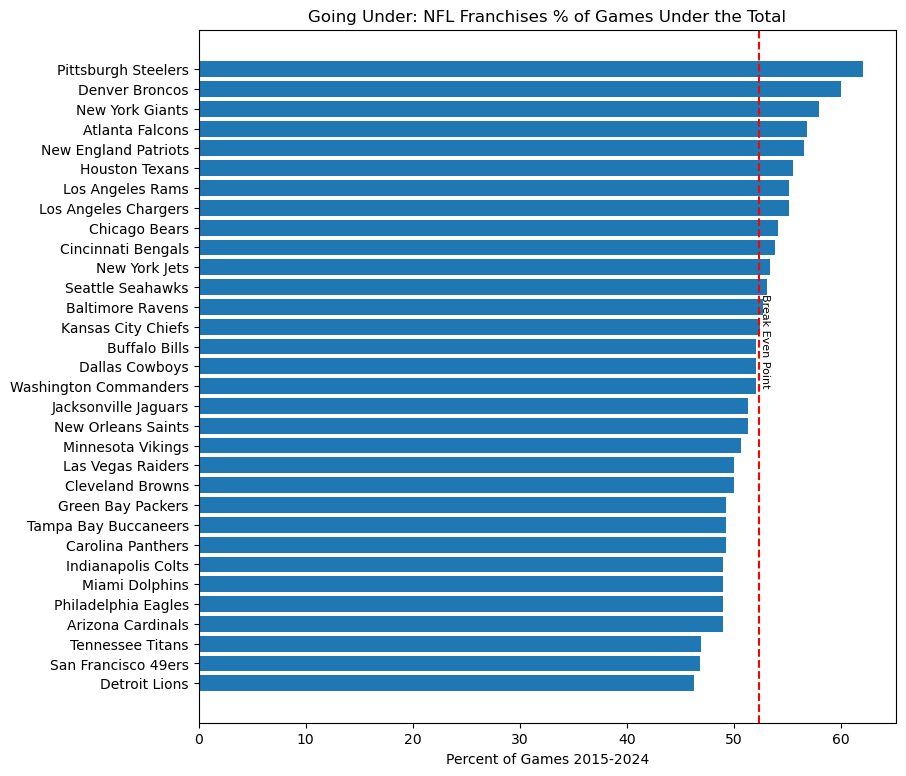

In [22]:
plt.figure(figsize=(9,9))
plt.barh(y=ou_under.index, width=ou_under)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games 2015-2024")
plt.title("Going Under: NFL Franchises % of Games Under the Total")
plt.show()

In [23]:
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_points,o_u
11343,New England Patriots,28,21,Pittsburgh Steelers,New England Patriots,-7.0,51.0,49,under
11344,Arizona Cardinals,31,19,New Orleans Saints,Arizona Cardinals,-2.5,48.5,50,over
11345,Buffalo Bills,27,14,Indianapolis Colts,Indianapolis Colts,-1.0,44.5,41,under
11346,Chicago Bears,23,31,Green Bay Packers,Green Bay Packers,-6.5,48.5,54,over
11347,Dallas Cowboys,27,26,New York Giants,Dallas Cowboys,-7.0,52.5,53,over


In [24]:
conditions = [(scores['score_home']>scores['score_away']), (scores['score_home']<scores['score_away']), (scores['score_home']==scores['score_away'])]
values = [scores['team_home'], scores['team_away'], scores['team_home']]
scores['winner'] = np.select(conditions, values)
              

In [25]:
conditions = [scores['winner']==scores['team_home'], scores['winner']==scores['team_away']]
values = [scores['score_home'], scores['score_away']]
scores['winning_score'] = np.select(conditions, values)

In [26]:
conditions = [(scores['score_home']>scores['score_away']), (scores['score_home']<scores['score_away']), (scores['score_home']==scores['score_away'])]
values = [scores['team_away'], scores['team_home'], scores['team_away']]
scores['loser'] = np.select(conditions, values)

In [27]:
conditions = [scores['winner']==scores['team_home'], scores['winner']==scores['team_away']]
values = [scores['score_away'], scores['score_home']]
scores['losing_score'] = np.select(conditions, values)

In [28]:
scores = scores.drop(columns=['team_home', 'score_home', 'score_away', 'team_away'])

In [29]:
conditions = [scores['team_favorite_id']==scores['winner'], scores['team_favorite_id']==scores['loser']]
values = [scores['winner'], scores['loser']]
scores['favorite'] = np.select(conditions, values)

In [30]:
conditions = [scores['favorite'] == scores['winner'], scores['favorite']==scores['loser']]
values = [scores['winning_score']+scores['spread_favorite'], scores['losing_score']+scores['spread_favorite']]
scores['adj_fav_score'] = np.select(conditions, values)

In [31]:
conditions = [scores['team_favorite_id']==scores['winner'], scores['team_favorite_id']==scores['loser']]
values = [scores['loser'], scores['winner']]
scores['underdog'] = np.select(conditions, values)

In [32]:
conditions = [scores['favorite'] == scores['winner'], scores['favorite']==scores['loser']]
values = [scores['losing_score'], scores['winning_score']]
scores['dog_score'] = np.select(conditions, values)

In [33]:
conditions = [scores['adj_fav_score']>scores['dog_score'], scores['adj_fav_score']<scores['dog_score'], scores['adj_fav_score']==scores['dog_score']]
values = ["cover", "loss", "push"]
scores['fav_cover'] = np.select(conditions, values)

In [34]:
conditions = [scores['adj_fav_score']>scores['dog_score'], scores['adj_fav_score']<scores['dog_score'], scores['adj_fav_score']==scores['dog_score']]
values = ["loss", "cover", "push"]
scores['dog_cover'] = np.select(conditions, values)

In [35]:
favcover = scores[["favorite", "fav_cover"]]
dogcover = scores[["underdog", "dog_cover"]]
favcover = favcover.rename(columns={'favorite': "team", 'fav_cover': "cover"})
dogcover = dogcover.rename(columns={'underdog': "team", 'dog_cover': "cover"})
cover = pd.concat([favcover, dogcover])
cover = cover[cover['cover']!='push']

In [36]:
cover_percent = cover.groupby("team").value_counts() / cover['team'].value_counts() * 100

In [37]:
cover_percent = cover_percent.unstack(level=1)

In [38]:
cover_percent = cover_percent.fillna(0)

In [39]:
covered = cover_percent['cover'].sort_values(ascending=True)
lost = cover_percent['loss'].sort_values(ascending=True)

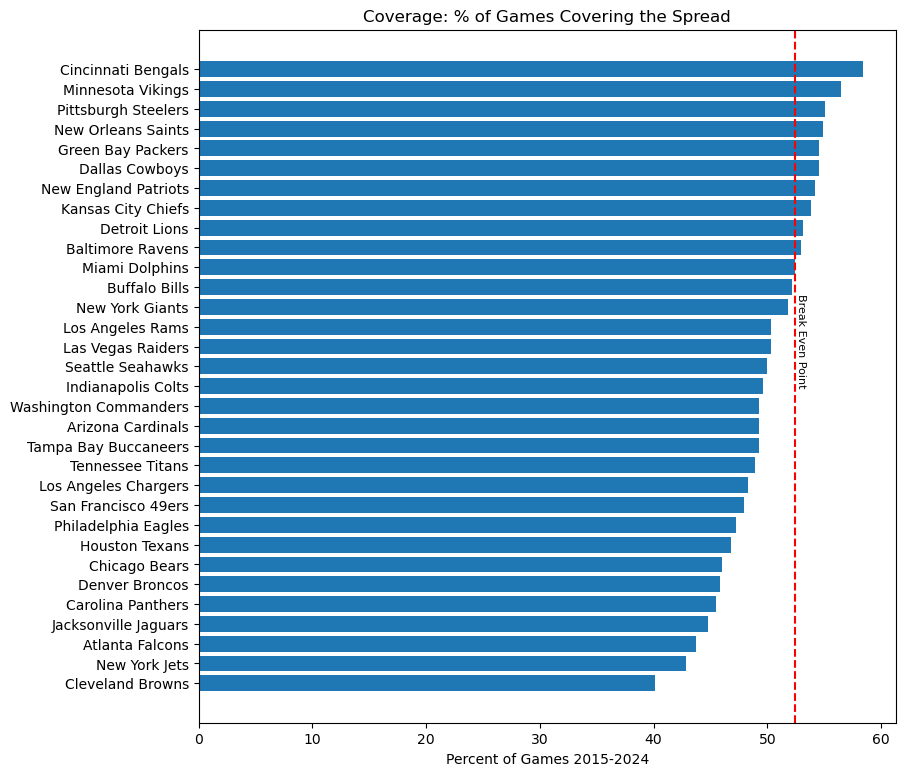

In [40]:
plt.figure(figsize=(9,9))
plt.barh(y=covered.index, width=covered)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games 2015-2024")
plt.title("Coverage: % of Games Covering the Spread")
plt.show()

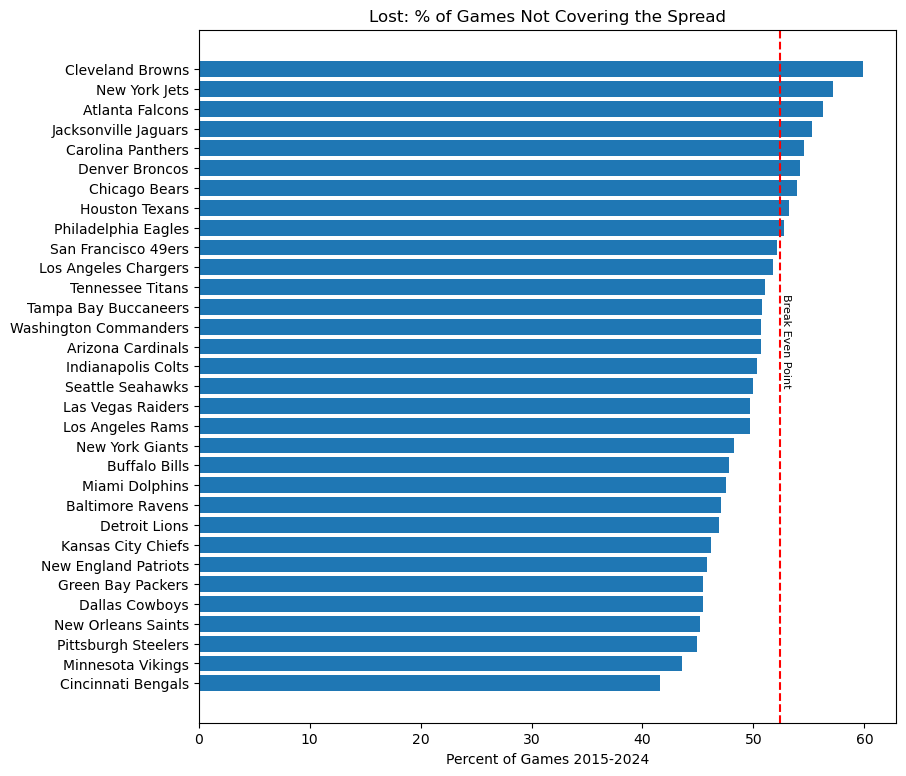

In [41]:
plt.figure(figsize=(9,9))
plt.barh(y=lost.index, width=lost)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games 2015-2024")
plt.title("Lost: % of Games Not Covering the Spread")
plt.show()

In [42]:
covered = covered.to_frame()
lost = lost.to_frame()
ou_over = ou_over.to_frame()
ou_under = ou_under.to_frame()

In [43]:
merge = covered.merge(lost, on='team')

In [44]:
merge2 = merge.merge(ou_over, on='team')

In [45]:
df = merge2.merge(ou_under, on='team')
df.head()

,cover,loss,over,under
team,,,,
Cleveland Browns,40.140845,59.859155,50.000000,50.000000
New York Jets,42.857143,57.142857,46.575342,53.424658
Atlanta Falcons,43.750000,56.250000,43.150685,56.849315
Jacksonville Jaguars,44.755245,55.244755,48.630137,51.369863
Carolina Panthers,45.454545,54.545455,50.694444,49.305556


In [46]:
df['short'] = df.index.map({'Arizona Cardinals': 'ARI',
 'Atlanta Falcons': 'ATL',
 'Baltimore Colts': 'IND',
 'Baltimore Ravens': 'BAL',
 'Boston Patriots': 'NE',
 'Buffalo Bills': 'BUF',
 'Carolina Panthers': 'CAR',
 'Chicago Bears': 'CHI',
 'Cincinnati Bengals': 'CIN',
 'Cleveland Browns': 'CLE',
 'Dallas Cowboys': 'DAL',
 'Denver Broncos': 'DEN',
 'Detroit Lions': 'DET',
 'Green Bay Packers': 'GB',
 'Houston Oilers': 'TEN',
 'Houston Texans': 'HOU',
 'Indianapolis Colts': 'IND',
 'Jacksonville Jaguars': 'JAX',
 'Kansas City Chiefs': 'KC',
 'Las Vegas Raiders': 'LVR',
 'Los Angeles Chargers': 'LAC',
 'Los Angeles Raiders': 'LVR',
 'Los Angeles Rams': 'LAR',
 'Miami Dolphins': 'MIA',
 'Minnesota Vikings': 'MIN',
 'New England Patriots': 'NE',
 'New Orleans Saints': 'NO',
 'New York Giants': 'NYG',
 'New York Jets': 'NYJ',
 'Oakland Raiders': 'LVR',
 'Philadelphia Eagles': 'PHI',
 'Phoenix Cardinals': 'ARI',
 'Pittsburgh Steelers': 'PIT',
 'San Diego Chargers': 'LAC',
 'San Francisco 49ers': 'SF',
 'Seattle Seahawks': 'SEA',
 'St. Louis Cardinals': 'ARI',
 'St. Louis Rams': 'LAR',
 'Tampa Bay Buccaneers': 'TB',
 'Tennessee Oilers': 'TEN',
 'Tennessee Titans': 'TEN',
 'Washington Commanders': 'WAS'})
df.head()

,cover,loss,over,under,short
team,,,,,
Cleveland Browns,40.140845,59.859155,50.000000,50.000000,CLE
New York Jets,42.857143,57.142857,46.575342,53.424658,NYJ
Atlanta Falcons,43.750000,56.250000,43.150685,56.849315,ATL
Jacksonville Jaguars,44.755245,55.244755,48.630137,51.369863,JAX
Carolina Panthers,45.454545,54.545455,50.694444,49.305556,CAR


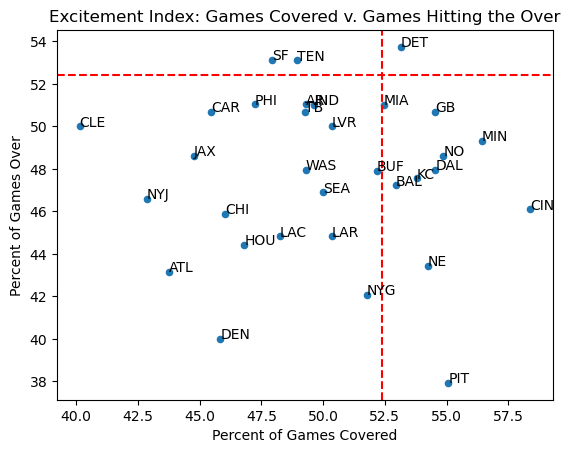

In [47]:
ax = df.plot(kind='scatter', x='cover', y='over')
for idx, row in df.iterrows():
    ax.annotate(row['short'], (row['cover'], row['over']))
plt.xlabel('Percent of Games Covered')
plt.ylabel('Percent of Games Over')
plt.title("Excitement Index: Games Covered v. Games Hitting the Over")
plt.axvline(x=52.4, color='r', linestyle='--')
plt.axhline(y=52.4, color='r', linestyle='--')
plt.show()

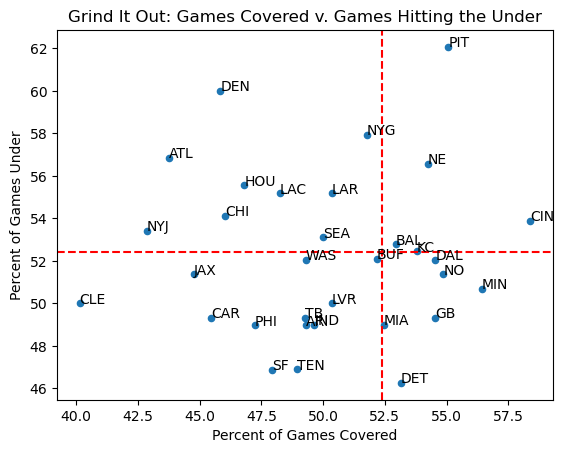

In [48]:
ax = df.plot(kind='scatter', x='cover', y='under')
for idx, row in df.iterrows():
    ax.annotate(row['short'], (row['cover'], row['under']))
plt.xlabel('Percent of Games Covered')
plt.ylabel('Percent of Games Under')
plt.title("Grind It Out: Games Covered v. Games Hitting the Under")
plt.axvline(x=52.4, color='r', linestyle='--')
plt.axhline(y=52.4, color='r', linestyle='--')
plt.show()

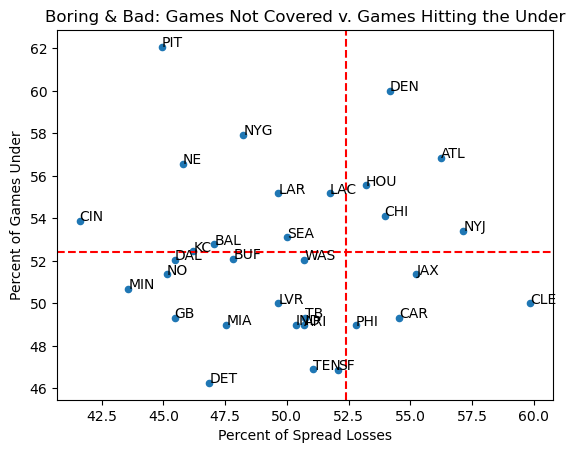

In [49]:
ax = df.plot(kind='scatter', x='loss', y='under')
for idx, row in df.iterrows():
    ax.annotate(row['short'], (row['loss'], row['under']))
plt.xlabel('Percent of Spread Losses')
plt.ylabel('Percent of Games Under')
plt.title("Boring & Bad: Games Not Covered v. Games Hitting the Under")
plt.axvline(x=52.4, color='r', linestyle='--')
plt.axhline(y=52.4, color='r', linestyle='--')
plt.show()

In [50]:
oudata.head()

,team,o_u
11343,New England Patriots,under
11344,Arizona Cardinals,over
11345,Buffalo Bills,under
11346,Chicago Bears,over
11347,Dallas Cowboys,over


In [51]:
conditions = [oudata['o_u'] == "over", oudata['o_u'] == 'under']
values = [91, -100]
oudata['over_payout'] = np.select(conditions, values)
oudata.head()

,team,o_u,over_payout
11343,New England Patriots,under,-100
11344,Arizona Cardinals,over,91
11345,Buffalo Bills,under,-100
11346,Chicago Bears,over,91
11347,Dallas Cowboys,over,91


In [52]:
conditions = [oudata['o_u'] == "over", oudata['o_u'] == 'under']
values = [-100, 91]
oudata['under_payout'] = np.select(conditions, values)
oudata.head()

,team,o_u,over_payout,under_payout
11343,New England Patriots,under,-100,91
11344,Arizona Cardinals,over,91,-100
11345,Buffalo Bills,under,-100,91
11346,Chicago Bears,over,91,-100
11347,Dallas Cowboys,over,91,-100


In [53]:
ou_payout = oudata.groupby("team").sum()

In [54]:
ou_payout.head()

,o_u,over_payout,under_payout
team,,,
Arizona Cardinals,overoveroverunderoverunderunderunderunderunder...,-366,-939
Atlanta Falcons,underoverunderunderunderunderunderunderoverove...,-2567,1253
Baltimore Ravens,overoveroverunderunderunderoverunderunderoveru...,-1412,116
Buffalo Bills,underoverunderoveroveroverunderunderoveroverov...,-1221,-75
Carolina Panthers,overunderoveroveroverunderoveroverunderunderov...,-457,-839


In [55]:
ou_payout_o = ou_payout.sort_values(by="over_payout", ascending=True)
conditions = [ou_payout_o['over_payout'] >= 0, ou_payout_o['over_payout'] < 0]
values = ["green", "red"]
ou_payout_o["bar_over"] = np.select(conditions, values)
ou_payout_u = ou_payout.sort_values(by="under_payout")
conditions = [ou_payout_u['under_payout'] >= 0, ou_payout_u['under_payout'] < 0]
values = ["green", "red"]
ou_payout_u["bar_under"] = np.select(conditions, values)
ou_payout_o.head()

,o_u,over_payout,under_payout,bar_over
team,,,,
Pittsburgh Steelers,overunderunderunderoverunderoveroverunderoveru...,-3995,2690,red
Denver Broncos,underunderunderoverunderunderoveroveroverunder...,-3422,2117,red
New York Giants,underoveroveroveroverunderoveroverunderoverove...,-2849,1544,red
Atlanta Falcons,underoverunderunderunderunderunderunderoverove...,-2567,1253,red
New England Patriots,underoveroverunderunderunderoveroveroverunderu...,-2467,1162,red


In [56]:
under_payout = ou_payout_u['under_payout']
under_bars = ou_payout_u['bar_under']
under_payout = pd.DataFrame(under_payout)
under_bars = pd.DataFrame(under_bars)
unders = under_payout.merge(under_bars, on='team')
unders.head()

,under_payout,bar_under
team,,
Detroit Lions,-1712,red
Tennessee Titans,-1512,red
San Francisco 49ers,-1503,red
Miami Dolphins,-948,red
Indianapolis Colts,-948,red


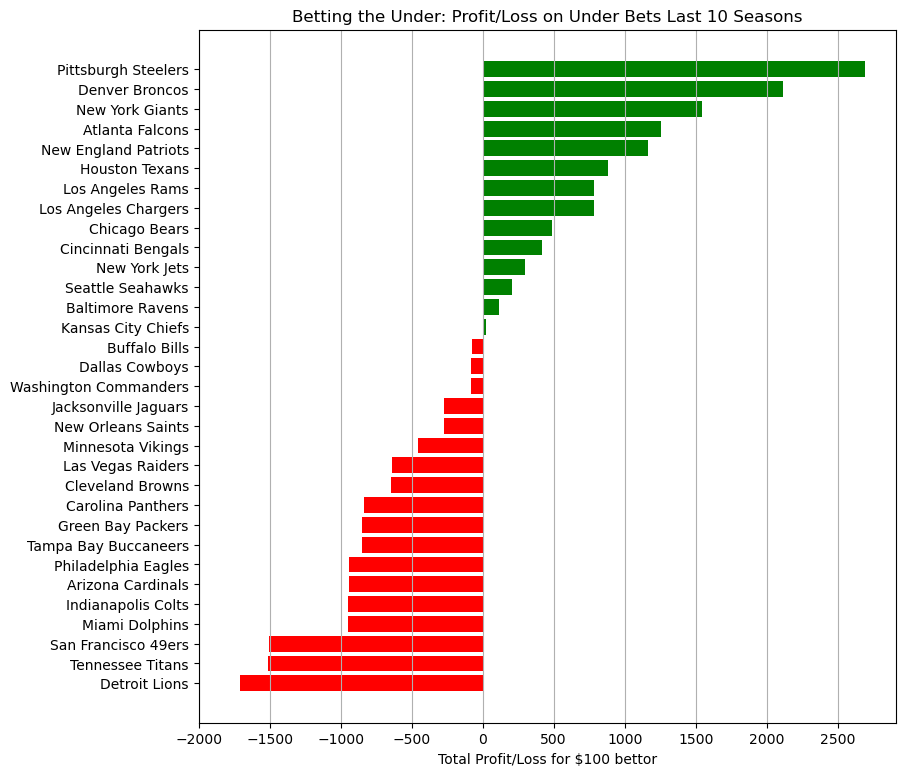

In [57]:
plt.figure(figsize=(9,9))
plt.barh(y=unders.index, width=unders['under_payout'], color=unders["bar_under"])
plt.xlabel("Total Profit/Loss for $100 bettor")
plt.xticks(np.arange(-2000, 3000, step=500))
plt.grid(axis='x')
plt.title("Betting the Under: Profit/Loss on Under Bets Last 10 Seasons")
plt.show()

In [58]:
over_payout = ou_payout_o['over_payout']
over_bars = ou_payout_o['bar_over']
over_payout = pd.DataFrame(over_payout)
over_bars = pd.DataFrame(over_bars)
overs = over_payout.merge(over_bars, on='team')

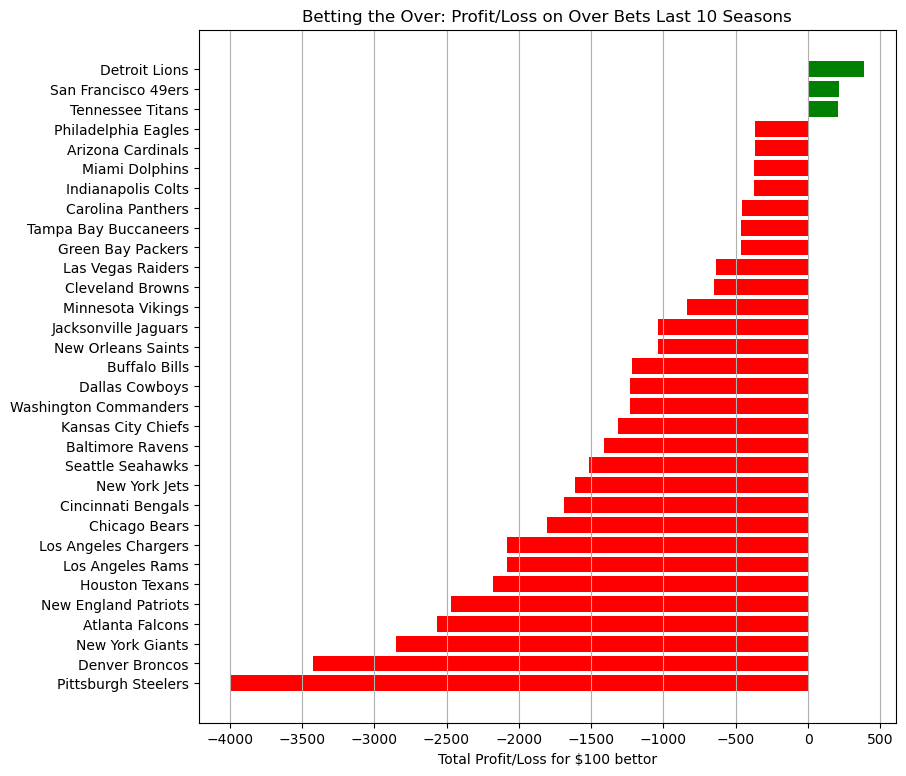

In [59]:
plt.figure(figsize=(9,9))
plt.barh(y=overs.index, width=overs['over_payout'], color=overs["bar_over"])
plt.xlabel("Total Profit/Loss for $100 bettor")
plt.title("Betting the Over: Profit/Loss on Over Bets Last 10 Seasons")
plt.xticks(np.arange(-4000, 1000, step=500))
plt.grid(axis='x')
plt.show()

In [60]:
cover.head()

,team,cover
11344,Arizona Cardinals,cover
11345,Indianapolis Colts,loss
11346,Green Bay Packers,cover
11347,Dallas Cowboys,loss
11348,Denver Broncos,cover


In [61]:
conditions = [cover["cover"] == "cover", cover["cover"] == 'loss']
values = [91, -100]
cover['cover_payout'] = np.select(conditions, values)
cover.head()

,team,cover,cover_payout
11344,Arizona Cardinals,cover,91
11345,Indianapolis Colts,loss,-100
11346,Green Bay Packers,cover,91
11347,Dallas Cowboys,loss,-100
11348,Denver Broncos,cover,91


In [62]:
cover_payout = cover.groupby("team").sum().sort_values(by='cover_payout')
cover_payout.head()

,cover,cover_payout
team,,
Cleveland Browns,losslosscoverlosscoverlosscoverlosslosscoverlo...,-3313
New York Jets,coverlosscovercoverlosslosslosslosscovercoverc...,-2540
Atlanta Falcons,coverlosslosslosslosslosslosslosslosslosslossl...,-2367
Jacksonville Jaguars,losscoverlosscoverlosslosslosslosslosscovercov...,-2076
Carolina Panthers,covercoverlosscovercoverlosscovercovercoverlos...,-1885


In [63]:
conditions = [cover_payout['cover_payout'] >= 0, cover_payout['cover_payout'] < 0]
values = ["green", "red"]
cover_payout["bar"] = np.select(conditions, values)
cover_payout.head()

,cover,cover_payout,bar
team,,,
Cleveland Browns,losslosscoverlosscoverlosscoverlosslosscoverlo...,-3313,red
New York Jets,coverlosscovercoverlosslosslosslosscovercoverc...,-2540,red
Atlanta Falcons,coverlosslosslosslosslosslosslosslosslosslossl...,-2367,red
Jacksonville Jaguars,losscoverlosscoverlosslosslosslosslosscovercov...,-2076,red
Carolina Panthers,covercoverlosscovercoverlosscovercovercoverlos...,-1885,red


In [64]:
cover_payouts = cover_payout['cover_payout']
cover_bars = cover_payout['bar']
cover_payouts = pd.DataFrame(cover_payouts)
cover_bars = pd.DataFrame(cover_bars)
covers = cover_payouts.merge(cover_bars, on='team')

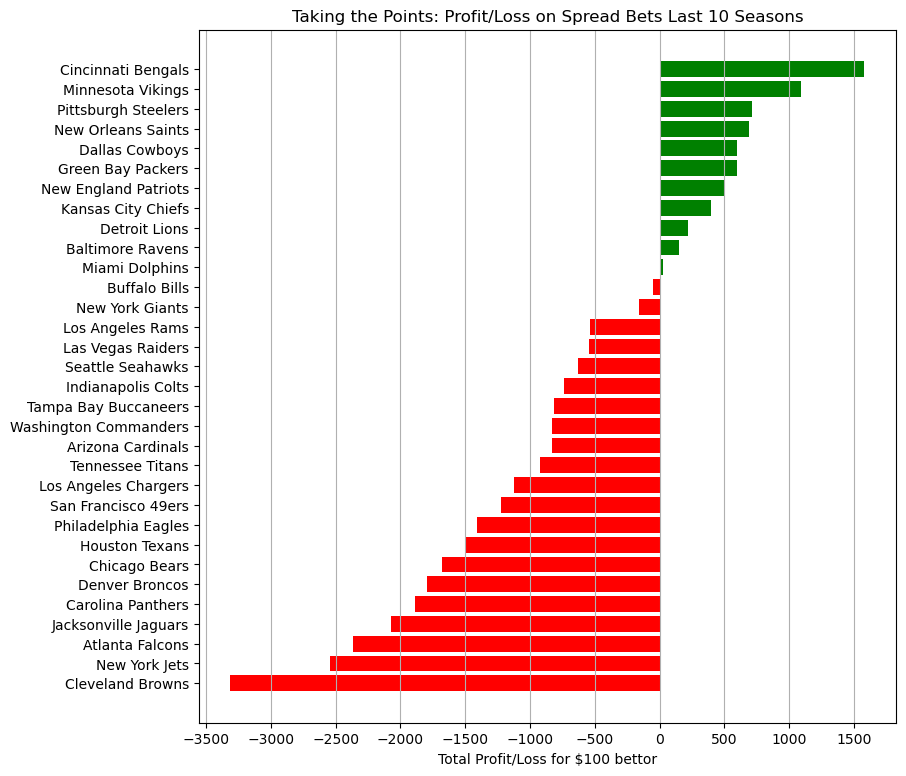

In [65]:
plt.figure(figsize=(9,9))
plt.barh(y=covers.index, width=covers['cover_payout'], color=covers["bar"])
plt.xlabel("Total Profit/Loss for $100 bettor")
plt.title("Taking the Points: Profit/Loss on Spread Bets Last 10 Seasons")
plt.xticks(np.arange(-3500, 2000, step=500))
plt.grid(axis='x')
plt.show()

In [66]:
went_over= ou_payout_o["over_payout"]
went_over = went_over.to_frame()
went_under= ou_payout_u["under_payout"]
went_under = went_under.to_frame()
covered = cover_payout['cover_payout']
covered= covered.to_frame()

In [67]:
merge3 = went_over.merge(went_under, on='team')
df2 = merge3.merge(covered, on='team')

In [68]:
df2['short'] = df2.index.map({'Arizona Cardinals': 'ARI',
 'Atlanta Falcons': 'ATL',
 'Baltimore Colts': 'IND',
 'Baltimore Ravens': 'BAL',
 'Boston Patriots': 'NE',
 'Buffalo Bills': 'BUF',
 'Carolina Panthers': 'CAR',
 'Chicago Bears': 'CHI',
 'Cincinnati Bengals': 'CIN',
 'Cleveland Browns': 'CLE',
 'Dallas Cowboys': 'DAL',
 'Denver Broncos': 'DEN',
 'Detroit Lions': 'DET',
 'Green Bay Packers': 'GB',
 'Houston Oilers': 'TEN',
 'Houston Texans': 'HOU',
 'Indianapolis Colts': 'IND',
 'Jacksonville Jaguars': 'JAX',
 'Kansas City Chiefs': 'KC',
 'Las Vegas Raiders': 'LVR',
 'Los Angeles Chargers': 'LAC',
 'Los Angeles Raiders': 'LVR',
 'Los Angeles Rams': 'LAR',
 'Miami Dolphins': 'MIA',
 'Minnesota Vikings': 'MIN',
 'New England Patriots': 'NE',
 'New Orleans Saints': 'NO',
 'New York Giants': 'NYG',
 'New York Jets': 'NYJ',
 'Oakland Raiders': 'LVR',
 'Philadelphia Eagles': 'PHI',
 'Phoenix Cardinals': 'ARI',
 'Pittsburgh Steelers': 'PIT',
 'San Diego Chargers': 'LAC',
 'San Francisco 49ers': 'SF',
 'Seattle Seahawks': 'SEA',
 'St. Louis Cardinals': 'ARI',
 'St. Louis Rams': 'LAR',
 'Tampa Bay Buccaneers': 'TB',
 'Tennessee Oilers': 'TEN',
 'Tennessee Titans': 'TEN',
 'Washington Commanders': 'WAS'})
df2.head()

,over_payout,under_payout,cover_payout,short
team,,,,
Pittsburgh Steelers,-3995,2690,716,PIT
Denver Broncos,-3422,2117,-1794,DEN
New York Giants,-2849,1544,-157,NYG
Atlanta Falcons,-2567,1253,-2367,ATL
New England Patriots,-2467,1162,507,NE


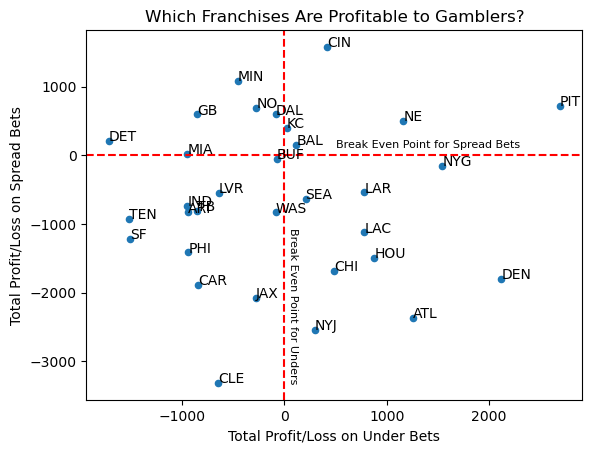

In [69]:
ax = df2.plot(kind='scatter', x='under_payout', y='cover_payout')
for idx, row in df2.iterrows():
    ax.annotate(row['short'], (row['under_payout'], row['cover_payout']))
plt.xlabel('Total Profit/Loss on Under Bets')
plt.ylabel('Total Profit/Loss on Spread Bets')
plt.title("Which Franchises Are Profitable to Gamblers?")
plt.text(40,-3300, "Break Even Point for Unders", size=8, rotation=270)
plt.text(500, 105, "Break Even Point for Spread Bets", size = 8)
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()